In [37]:
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 5.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [39]:
import pandas as pd
import spacy
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [40]:
nlp = spacy.load("es_core_news_sm")
df = pd.read_csv("../data/comentarios.csv")

def preprocesar(texto):
    doc = nlp(texto.lower())
    return [t.lemma_ for t in doc if not t.is_stop and t.is_alpha]

comentarios_tokens = df["texto_comentario"].apply(preprocesar)

In [44]:
# Entrenar Word2Vec
model = Word2Vec(
    sentences=comentarios_tokens,
    vector_size=50,  # dimensión pequeña para demo
    window=5,
    min_count=1,
    workers=4
)

# Consultar palabras más similares o relacionadas
print(model.wv.most_similar("laptop", topn=5))
print(model.wv.most_similar("cámara", topn=5))

[('gráfico', 0.9883868098258972), ('rendimiento', 0.9881861805915833), ('calidad', 0.9877440929412842), ('rápido', 0.9874306321144104), ('potente', 0.9871538281440735)]
[('calidad', 0.9910835027694702), ('rendimiento', 0.9892893433570862), ('perfecto', 0.9892160296440125), ('pantalla', 0.9885965585708618), ('ideal', 0.9880065321922302)]


In [45]:
# Acceder y mostrar el vector de la palabra "laptop"
print("\nVector de la palabra 'laptop':")
print(model.wv['laptop'])

# Acceder y mostrar el vector de la palabra "cámara"
print("\nVector de la palabra 'cámara':")
print(model.wv['cámara'])


Vector de la palabra 'laptop':
[-0.01369958 -0.02519202  0.06537988  0.0256156   0.03419279 -0.09162034
  0.07568633  0.2269785  -0.12990518 -0.06725644 -0.02695039 -0.13592833
 -0.03795129  0.03320256 -0.05555238  0.06935786  0.01098529  0.00723297
 -0.1331571  -0.08706179 -0.02271749  0.05382966  0.15178232 -0.0201636
  0.08787089  0.05328607 -0.06284502  0.03798166 -0.18521196  0.00638402
  0.01301803  0.03810378 -0.04676286  0.05026964 -0.08761484  0.08352026
  0.14142261  0.03209938  0.05133107 -0.07907421  0.17720866 -0.02478805
 -0.07170022  0.10861246  0.24796367  0.03092245  0.04566757 -0.08246255
  0.08064384 -0.01125353]

Vector de la palabra 'cámara':
[-1.34002818e-02 -2.95559950e-02  5.36857061e-02  1.93578433e-02
  4.06385995e-02 -1.04458258e-01  1.00475572e-01  2.41284698e-01
 -1.55711681e-01 -4.41163629e-02 -3.78202312e-02 -1.39581963e-01
 -3.89355347e-02  4.98337252e-03 -7.79919624e-02  6.95659369e-02
 -3.57018784e-03  5.99636289e-04 -1.51726454e-01 -9.83842239e-02
 -

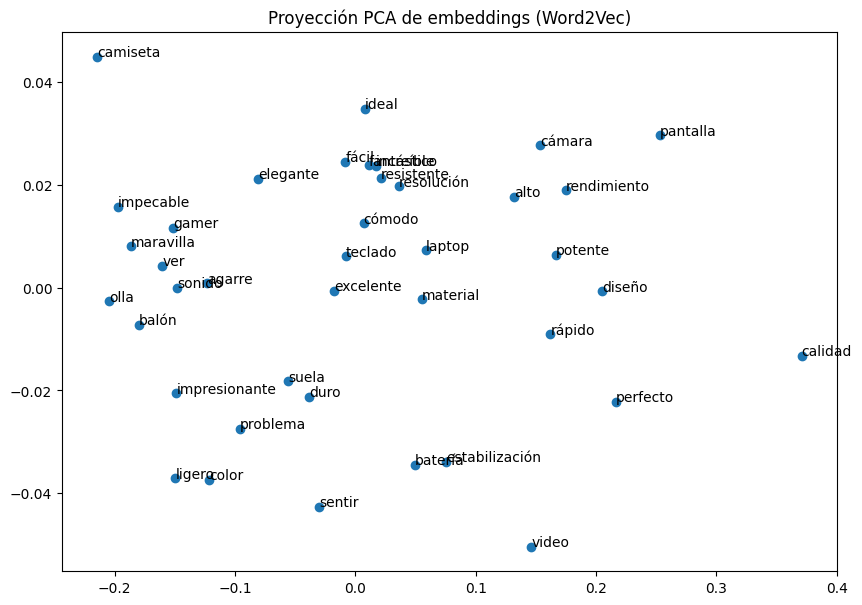

In [46]:
words = list(model.wv.key_to_index.keys())[:40]
X = model.wv[words]

pca = PCA(n_components=2)
coords = pca.fit_transform(X)

plt.figure(figsize=(10,7))
plt.scatter(coords[:,0], coords[:,1])
for i, word in enumerate(words):
    plt.annotate(word, (coords[i,0], coords[i,1]))
plt.title("Proyección PCA de embeddings (Word2Vec)")
plt.show()